## Importación de datos

In [1]:
# Import lib's

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# import dataset's
# Loading final demo df = Client profiles (demographic)
final_demo_df = pd.read_csv("/Users/juanfransf/IRONHACK/COURSE/GitHub_LESSONS/5. WEEK 5/MINI PROJECT WEEK 5/df_final_demo.txt")
# Loading Digital Footprints (df_final_web_data) = trace of client interactions online_1/2
final_web_data_1_df = pd.read_csv("/Users/juanfransf/IRONHACK/COURSE/GitHub_LESSONS/5. WEEK 5/MINI PROJECT WEEK 5/df_final_web_data_pt_1.txt")
# Loading Digital Footprints (df_final_web_data) = trace of client interactions online_2/2
final_web_data_2_df = pd.read_csv("/Users/juanfransf/IRONHACK/COURSE/GitHub_LESSONS/5. WEEK 5/MINI PROJECT WEEK 5/df_final_web_data_pt_2.txt")
# Loading Experiment Roster (df_final_experiment_clients) = which clients were part of the grand experiment.
final_experiment_clients_df = pd.read_csv("/Users/juanfransf/IRONHACK/COURSE/GitHub_LESSONS/5. WEEK 5/MINI PROJECT WEEK 5/df_final_experiment_clients.txt")

### 1. Ánalisis final_demo_df. Datos demográficos

In [3]:
# Display the first few rows of the dataset
final_demo_df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [4]:
# Cambiar nombre a columnas

nuevos_nombres = {'clnt_tenure_yr': 'clnt_Yr_permanency', 'clnt_tenure_mnth': 'clnt_Mnth_permanency', 'clnt_age': 'age','gendr': 'gender','num_accts': 'accounts','bal': 'balance'}
final_demo_df = final_demo_df.rename(columns=nuevos_nombres)

In [5]:
# Reemplazar valor x por u en la columna gender

final_demo_df['gender'] = final_demo_df['gender'].replace('X', 'U')

In [6]:
final_demo_df.head()

,client_id,clnt_Yr_permanency,clnt_Mnth_permanency,age,gender,accounts,balance,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


#### Análisis preliminar

In [7]:
final_demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             70609 non-null  int64  
 1   clnt_Yr_permanency    70595 non-null  float64
 2   clnt_Mnth_permanency  70595 non-null  float64
 3   age                   70594 non-null  float64
 4   gender                70595 non-null  object 
 5   accounts              70595 non-null  float64
 6   balance               70595 non-null  float64
 7   calls_6_mnth          70595 non-null  float64
 8   logons_6_mnth         70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [8]:
final_demo_df.describe()

,client_id,clnt_Yr_permanency,clnt_Mnth_permanency,age,accounts,balance,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.004992e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [9]:
final_demo_df.isnull().sum()

client_id                0
clnt_Yr_permanency      14
clnt_Mnth_permanency    14
age                     15
gender                  14
accounts                14
balance                 14
calls_6_mnth            14
logons_6_mnth           14
dtype: int64

#### **Análisis Univariante**:

##### Histograma para variable numérica

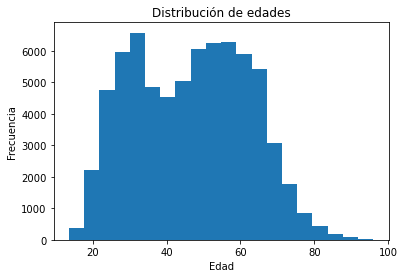

In [10]:
import matplotlib.pyplot as plt

plt.hist(final_demo_df['age'], bins=20)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades')
plt.show()

##### Gráfico de barras para variable categórica

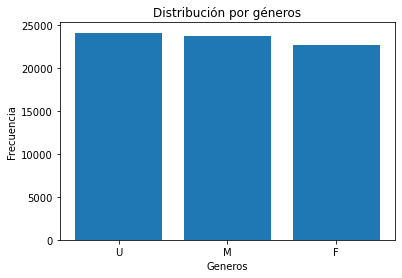

In [11]:
plt.bar(final_demo_df['gender'].value_counts().index, final_demo_df['gender'].value_counts())
plt.xlabel('Generos')
plt.ylabel('Frecuencia')
plt.title('Distribución por géneros')
plt.show()

#### **Análisis Bivariante**:

##### Gráfico de caja y bigotes para variable numérica vs. variable categórica


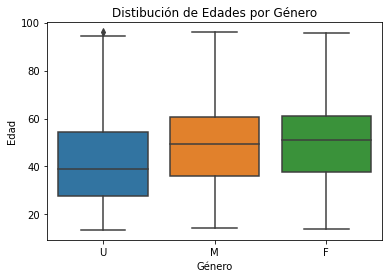

In [12]:
import seaborn as sns

sns.boxplot(x='gender', y='age', data=final_demo_df)
plt.xlabel('Género')
plt.ylabel('Edad')
plt.title('Distibución de Edades por Género')
plt.show()

### 2. Análisis datos final_web_df. Trazabilidad de interacciones del cliente

##### 2.1 Merge de df final_web_data1_df + final_web_data2_df

In [13]:
final_web_data_1_df.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [14]:
final_web_data_1_df.shape

(343141, 5)

In [15]:
final_web_data_2_df.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [16]:
final_web_data_2_df.shape

(412264, 5)

##### 2.2 Tabla final con el concat de las dos tablas

In [17]:
# Fusión web data 1 + web data 2

final_web_data_df = pd.concat([final_web_data_1_df, final_web_data_2_df], axis=0, ignore_index=True)

final_web_data_df.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


##### 2.3 Análisis preliminares

In [18]:
final_web_data_df.shape

(755405, 5)

In [19]:
final_web_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB


In [20]:
final_web_data_df.describe()

,client_id
count,7.554050e+05
mean,5.013632e+06
std,2.879152e+06
min,1.690000e+02
25%,2.519882e+06
50%,5.033441e+06
75%,7.496063e+06
max,9.999875e+06


In [21]:
final_web_data_df.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

#### 2.4. Análisis Univariante:


In [22]:
final_web_data_df.nunique()

client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64

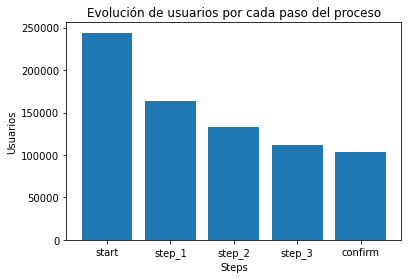

In [23]:
import matplotlib.pyplot as plt

plt.bar(final_web_data_df['process_step'].value_counts().index, final_web_data_df['process_step'].value_counts())
plt.xlabel('Steps')
plt.ylabel('Usuarios')
plt.title('Evolución de usuarios por cada paso del proceso')
plt.show()

### 3. Análisis datos final_experiment_clients_df. Clientes que formaron parte de cada experimento A/B en modelo antiguo vs. nuevo
#### 3.1 Análisis preliminares


In [24]:
final_experiment_clients_df.head()
final_experiment_clients_df

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [25]:
final_experiment_clients_df.shape
final_experiment_clients_df

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [26]:
final_experiment_clients_df.info()
final_experiment_clients_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [27]:
final_experiment_clients_df.describe()
final_experiment_clients_df

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [28]:
final_experiment_clients_df.isnull().sum()
final_experiment_clients_df

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


#### 3.1 Análisis Univariante
##### 3.1.1 Gráfico de barras para variable categórica

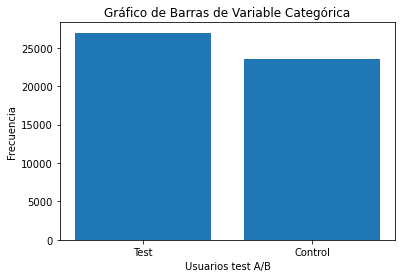

In [29]:
import matplotlib.pyplot as plt

plt.bar(final_experiment_clients_df['Variation'].value_counts().index, final_experiment_clients_df['Variation'].value_counts())
plt.xlabel('Usuarios test A/B')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras de Variable Categórica')
plt.show()

### 4. Análisis del comportamiento del cliente

In [30]:
final_demo_df.head()

,client_id,clnt_Yr_permanency,clnt_Mnth_permanency,age,gender,accounts,balance,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


#### 4.1 Principales clientes que utilizan este proceso en línea

In [31]:
top_5_balance = final_demo_df.nlargest(5, 'balance')
top_5_balance

,client_id,clnt_Yr_permanency,clnt_Mnth_permanency,age,gender,accounts,balance,calls_6_mnth,logons_6_mnth
39367,9286288,21.0,254.0,62.5,M,3.0,16320040.15,6.0,9.0
63746,8339240,6.0,80.0,26.5,M,2.0,12838418.01,3.0,3.0
23849,7070097,11.0,133.0,53.0,M,2.0,8986419.77,6.0,9.0
13318,9440656,7.0,94.0,63.0,F,2.0,8292996.21,6.0,9.0
2171,2291985,7.0,85.0,41.0,M,2.0,8247729.97,1.0,4.0


#### 4.2 Edades de los clientes


In [32]:
# Seleccionar las columnas de edad y sexo para el nuevo DataFrame
demograf_cust_df = final_demo_df[['client_id','age', 'gender']]
demograf_cust_df


,client_id,age,gender
0,836976,60.5,U
1,2304905,58.0,U
2,1439522,32.0,U
3,1562045,49.0,M
4,5126305,33.0,F
...,...,...,...
70604,7993686,38.5,U
70605,8981690,31.0,M
70606,333913,61.5,F
70607,1573142,68.0,M


#### 4.3 Clientes nuevos vs. antiguos
##### 4.3.1 Top 5 en antigüedad de clientes y meses de permanencia mínima de clientes en la empresa

In [33]:
top_5_balance = final_demo_df.nlargest(5, 'clnt_Yr_permanency')
top_5_balance

,client_id,clnt_Yr_permanency,clnt_Mnth_permanency,age,gender,accounts,balance,calls_6_mnth,logons_6_mnth
64690,357409,62.0,749.0,51.0,F,2.0,317681.78,4.0,4.0
11329,4833584,55.0,669.0,45.0,M,4.0,718973.76,6.0,9.0
12871,3271450,55.0,669.0,48.5,M,4.0,219932.98,0.0,3.0
22168,5430117,55.0,668.0,42.5,M,2.0,130125.49,1.0,4.0
23857,2354035,55.0,668.0,72.0,F,2.0,157703.82,3.0,6.0


In [34]:
# Número de meses de permanencia mínima 

min_value_column = final_demo_df['clnt_Mnth_permanency'].min()
min_value_column

33.0

##### 4.3.2 Número de clientes antiguos vs. clientes nuevos

In [35]:
# Especificar el número de años y meses para clasificar a los clientes
años_antiguo = 30  # Definir el número de años para clasificar como "antiguos"
meses_nuevo =  33   # Definir el número de meses para clasificar como "nuevos"

# Contar clientes antiguos (con años superiores al límite)
clientes_antiguos = final_demo_df['clnt_Yr_permanency'].apply(lambda x: x >= años_antiguo).sum()

# Contar clientes nuevos (con menos de los años establecidos o con el mismo número de años y menos meses)
clientes_nuevos = final_demo_df['clnt_Mnth_permanency'].apply(lambda x: x <= meses_nuevo).sum()

# Mostrar los resultados
print("Clientes antiguos:", clientes_antiguos)
print("Clientes nuevos:", clientes_nuevos)

Clientes antiguos: 1339
Clientes nuevos: 19


#### 4.4 Distribución de géneros en la base de clientes

In [36]:
crosstab_demograf_cust_df= pd.crosstab(demograf_cust_df['gender'], demograf_cust_df['age'])

crosstab_demograf_cust_df

age,13.5,14.0,14.5,15.0,15.5,16.0,16.5,17.0,17.5,18.0,...,91.0,91.5,92.0,92.5,93.0,93.5,94.0,94.5,95.5,96.0
gender,,,,,,,,,,,,,,,,,,,,,
F,0,1,3,0,6,12,11,12,13,27,...,3,2,2,2,2,1,0,0,1,0
M,0,0,4,8,5,9,8,17,25,38,...,2,4,2,1,0,2,0,0,0,1
U,1,1,16,14,26,19,46,32,85,89,...,1,0,1,1,1,1,3,1,0,1


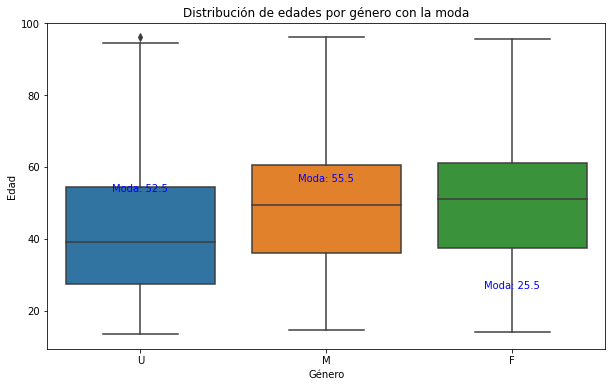

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la moda para cada género
moda_por_genero = final_demo_df.groupby('gender')['age'].apply(lambda x: x.mode()[0])

# Crear un gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=final_demo_df)

# Añadir la línea de la media y mostrar la moda para cada género
for i, moda in enumerate(moda_por_genero):
    plt.text(i, moda, f'Moda: {moda}', ha='center', va='bottom', color='blue')

# Añadir título y etiquetas de ejes
plt.title('Distribución de edades por género con la moda')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

In [38]:
frequency_table_gender = final_demo_df['gender'].value_counts()
frequency_table_gender

# Calculating the proportion of each unique value
proportion_table_gender = final_demo_df['gender'].value_counts(normalize=True)

print (frequency_table_gender, proportion_table_gender)

U    24125
M    23724
F    22746
Name: gender, dtype: int64 U    0.341738
M    0.336058
F    0.322204
Name: gender, dtype: float64


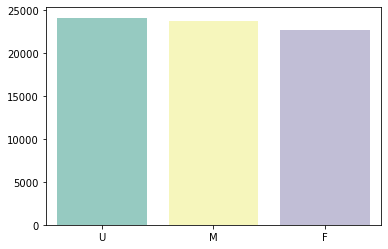

In [39]:
# Plotting a bar chart
sns.barplot(x=frequency_table_gender.index, y=frequency_table_gender.values, palette="Set3");


In [40]:
# Frequency table
frequency_table_age = final_demo_df['age'].value_counts()

# Calculating the proportion of each unique value
proportion_table_age = final_demo_df['age'].value_counts(normalize=True)

print(frequency_table_age, proportion_table_age)

58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
94.5      1
95.5      1
13.5      1
Name: age, Length: 165, dtype: int64 58.5    0.012168
55.5    0.011757
29.5    0.011743
28.5    0.011715
57.5    0.011701
          ...   
96.0    0.000028
14.0    0.000028
94.5    0.000014
95.5    0.000014
13.5    0.000014
Name: age, Length: 165, dtype: float64


### 5. Comportamiento del cliente
#### 5.1 Unión de los df's: 
##### - final_web_data_df U (trazabilidad de las interacciones del cliente)
##### - final_experiment_clients_df (clientes que participan en cada experimento)

In [41]:
final_experiment_clients_df.isnull().sum()

client_id        0
Variation    20109
dtype: int64

In [42]:
# Limpiar nulos del df final_experiment_clients_df 

# Ver la cantidad de valores nulos antes de limpiar
missing_before = final_experiment_clients_df.isnull().sum()

# Limpiar los nulos
final_experiment_clients_df_cleaned = final_experiment_clients_df.dropna(subset=['Variation'])

# Ver la cantidad de valores nulos después de limpiar
missing_after = final_experiment_clients_df_cleaned.isnull().sum()

# Combinar los datos en un DataFrame para comparar
comparison_df = pd.DataFrame({
    'before': missing_before,
    'after': missing_after
})
comparison_df

,before,after
client_id,0,0
Variation,20109,0


In [43]:
from functools import reduce

# Lista de DataFrames
interactions_and_testA_B_df = [final_web_data_df, final_experiment_clients_df_cleaned]

# Función para unir de forma acumulativa
interactions_df = reduce(lambda left, right: pd.merge(left, right, on='client_id', how='inner'), interactions_and_testA_B_df)
interactions_df.head()



,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test


In [44]:
# Registros totales en df interactions_df:

interactions_df.shape

(321309, 6)

In [45]:
# Registros únicos en df interactions_df:

client_counts = interactions_df['client_id'].value_counts()
print(client_counts)

2274658    90
1595223    81
5951379    81
1952790    80
7733877    72
           ..
6315358     1
2849164     1
8716105     1
3866204     1
5381516     1
Name: client_id, Length: 50500, dtype: int64


#### 5.1 Embudo de conversión

In [46]:
# Ordenar datos relativos a las sesiones de cada cliente y a las fechas de cada una de ellas

interactions_df['date_time'] = pd.to_datetime(interactions_df['date_time'])
interactions_df = interactions_df.sort_values(['visit_id', 'date_time'])
interactions_df

,client_id,visitor_id,visit_id,process_step,date_time,Variation
116364,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test
116363,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test
256806,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test
256805,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test
256804,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test
...,...,...,...,...,...,...
104065,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,Test
104064,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test
104063,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,Test
104062,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test


In [47]:
# Control datos correctos en funnel de conversión:
# Contar visitantes únicos en cada etapa
unique_visitors_per_stage = interactions_df.groupby('process_step')['visitor_id'].nunique()
# Ordenar en orden descendente
unique_visitors_per_stage = unique_visitors_per_stage.sort_values(ascending=False)

unique_visitors_per_stage


process_step
start      54465
step_1     46623
step_2     41988
step_3     38819
confirm    34922
Name: visitor_id, dtype: int64

In [48]:
#Funnel de conversión:

# Contar visitantes únicos en cada etapa sin considerar variantes
total_unique_visitors = interactions_df.groupby('process_step')['visitor_id'].nunique()

# Contar visitantes únicos en cada etapa y por variante (Test/Control)
unique_visitors_per_stage = interactions_df.groupby(['process_step', 'Variation'])['visitor_id'].nunique().reset_index()

# Crear una tabla pivot para colocar las variantes en columnas
pivot_table = unique_visitors_per_stage.pivot_table(index='process_step', columns='Variation', values='visitor_id', fill_value=0)

# Añadir una columna con el total de visitantes únicos por etapa
pivot_table['Total Unique Visitors'] = total_unique_visitors

# Ordenar en orden descendente por el total de visitantes únicos
pivot_table = pivot_table.sort_values('Total Unique Visitors', ascending=False)

# Mostrar el resultado
pivot_table

Variation,Control,Test,Total Unique Visitors
process_step,,,
start,25908,28736,54465
step_1,21234,25554,46623
step_2,19165,22978,41988
step_3,17699,21270,38819
confirm,15566,19505,34922


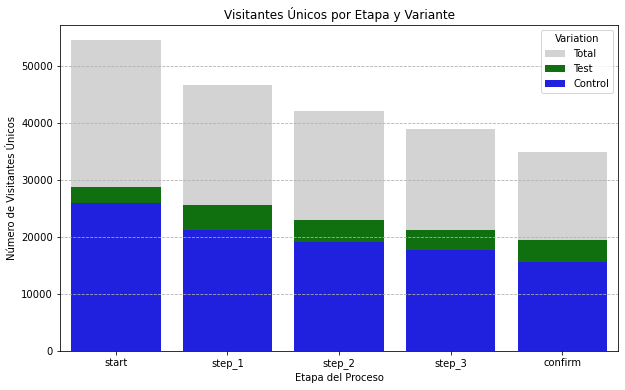

In [49]:
import seaborn as sns

# Reiniciar el índice para usar con seaborn
pivot_table_reset = pivot_table.reset_index()

# Gráfico con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    x='process_step', y='Total Unique Visitors', data=pivot_table_reset, color='lightgray', label='Total'
)

sns.barplot(
    x='process_step', y='Test', data=pivot_table_reset, color='green', label='Test'
)

sns.barplot(
    x='process_step', y='Control', data=pivot_table_reset, color='blue', label='Control'
)

plt.legend(title='Variation')
plt.title('Visitantes Únicos por Etapa y Variante')
plt.xlabel('Etapa del Proceso')
plt.ylabel('Número de Visitantes Únicos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

#### 5.2 Cálculo del Completion Rate

##### 5.2.1 Cálculo del Completion Rate

In [50]:
import pandas as pd


# Calcular visitantes únicos por paso y variación
unique_visitors_per_step_variation = interactions_df.groupby(['process_step', 'Variation'])['visitor_id'].nunique()

# Sumar los visitantes únicos por variación para obtener el total de visitantes que interactuaron en cualquier paso
total_participants_by_variation = unique_visitors_per_step_variation.groupby('Variation').sum()

# Obtener el número de visitantes únicos que llegaron al paso 'confirm' por variación
completed_by_variation = unique_visitors_per_step_variation.loc['confirm']

# Calcular el completion rate
completion_rate = (completed_by_variation / total_participants_by_variation) * 100

# Mostrar los resultados
print("Completion Rates by Variation:")
print(completion_rate)

Completion Rates by Variation:
Variation
Control    15.632909
Test       16.523640
Name: visitor_id, dtype: float64


In [51]:
#Exportar el cálculo de Completion rate para Tableau

In [52]:
import pandas as pd

# Convertir los resultados en un DataFrame para exportar
C_R_data_for_tableau_df = pd.DataFrame({
    'Variation': ['Test', 'Control'], 
    'Completion Rate': [completion_rate['Test'], completion_rate['Control']] 
})


#### 5.3 Tiempo que pasa el usuario en cada paso del proceso

In [53]:
interactions_df.head()

,client_id,visitor_id,visit_id,process_step,date_time,Variation
116364,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test
116363,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test
256806,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test
256805,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test
256804,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test


##### 5.3.1 Adaptación del df

In [54]:
# Separar la columna date_time en date y time 

interactions_df['date'] = interactions_df['date_time'].dt.date
interactions_df['time'] = interactions_df['date_time'].dt.time

In [55]:
# Convertir 'date' a formato datetime
interactions_df['date'] = pd.to_datetime(interactions_df['date'])

# Convertir 'time' a timedelta usando pd.to_timedelta
interactions_df['time'] = pd.to_timedelta(interactions_df['time'].astype(str))

##### 5.3.2 Análisis del proceso.
##### - 5.3.2.1 Usuarios y tiempo por cada paso

In [56]:
import pandas as pd

# Supongamos que ya tienes el DataFrame interactions_df cargado

# Ordenar correctamente el DataFrame
interactions_df.sort_values(by=['client_id', 'Variation', 'visit_id', 'date_time'], inplace=True)

# Calcular el tiempo pasado entre process_step consecutivos
interactions_df['time_spent'] = interactions_df.groupby(['client_id', 'Variation', 'visit_id'])['date_time'].diff()

# Extraer días y tiempo separadamente
interactions_df['date_spent'] = interactions_df['time_spent'].dt.days.fillna(0).astype(int)

# Ajustar días negativos a cero
interactions_df['date_spent'] = interactions_df['date_spent'].apply(lambda x: max(x, 0))

# Convertir time_spent a segundos y ajustar valores negativos a cero
interactions_df['time_spent_sec'] = interactions_df['time_spent'].apply(
    lambda x: x.total_seconds() % 86400 if pd.notnull(x) else 0
)

# Convertir valores negativos a positivos dentro del rango diario
interactions_df['time_spent'] = pd.to_timedelta(interactions_df['time_spent_sec'], unit='s')

# Verificar el DataFrame resultante
interactions_df


,client_id,visitor_id,visit_id,process_step,date_time,Variation,date,time,time_spent,date_spent,time_spent_sec
77131,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,2017-04-15,0 days 12:57:56,0 days 00:00:00,0,0.0
77130,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,2017-04-15,0 days 12:58:03,0 days 00:00:07,0,7.0
77129,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,2017-04-15,0 days 12:58:35,0 days 00:00:32,0,32.0
77128,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,2017-04-15,0 days 13:00:14,0 days 00:01:39,0,99.0
77127,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,2017-04-15,0 days 13:00:34,0 days 00:00:20,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
114787,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,2017-05-08,0 days 16:09:40,0 days 00:00:21,0,21.0
114782,9999729,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,Test,2017-04-05,0 days 13:40:49,0 days 00:00:00,0,0.0
114781,9999729,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,Test,2017-04-05,0 days 13:41:04,0 days 00:00:15,0,15.0
264543,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,2017-05-16,0 days 16:46:03,0 days 00:00:00,0,0.0


#####      - 5.3.2.1.1 Usuarios y tiempo por cada paso, adaptado para análisis en tableau con columna suma de segundos: "time_spent_sec"

In [57]:
# Crear una copia del DataFrame original
interactions_df_tableau = interactions_df.copy()

# Crear la nueva columna con el tiempo en segundos en el DataFrame copiado
interactions_df_tableau['time_spent_sec'] = interactions_df_tableau['time_spent'].dt.total_seconds()

# Mostrar el DataFrame resultante
interactions_df_tableau

,client_id,visitor_id,visit_id,process_step,date_time,Variation,date,time,time_spent,date_spent,time_spent_sec
77131,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,2017-04-15,0 days 12:57:56,0 days 00:00:00,0,0.0
77130,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,2017-04-15,0 days 12:58:03,0 days 00:00:07,0,7.0
77129,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,2017-04-15,0 days 12:58:35,0 days 00:00:32,0,32.0
77128,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,2017-04-15,0 days 13:00:14,0 days 00:01:39,0,99.0
77127,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,2017-04-15,0 days 13:00:34,0 days 00:00:20,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
114787,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,2017-05-08,0 days 16:09:40,0 days 00:00:21,0,21.0
114782,9999729,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,Test,2017-04-05,0 days 13:40:49,0 days 00:00:00,0,0.0
114781,9999729,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,Test,2017-04-05,0 days 13:41:04,0 days 00:00:15,0,15.0
264543,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,2017-05-16,0 days 16:46:03,0 days 00:00:00,0,0.0


##### - 5.3.2.2 Media de tiempo que pasa el usuario en cada paso

In [58]:
# Reemplazar NaT (con Timedelta cero)
interactions_df['time_spent'] = interactions_df['time_spent'].fillna(pd.Timedelta(seconds=0))

# Agrupar y calcular la media nuevamente
mean_time_spent = interactions_df.groupby(['process_step'])['time_spent'].mean()
mean_time_spent 

process_step
confirm   0 days 00:01:56.354593194
start     0 days 00:00:57.392719202
step_1    0 days 00:00:39.645289029
step_2    0 days 00:00:43.602074725
step_3    0 days 00:01:34.158598451
Name: time_spent, dtype: timedelta64[ns]

In [59]:
# Calcular la media conjunta por process_step
mean_time_spent_overall_sec = interactions_df.groupby(['process_step'])['time_spent_sec'].mean()

# Mostrar el resultado final
mean_time_spent_overall_sec

process_step
confirm    116.354593
start       57.392719
step_1      39.645289
step_2      43.602075
step_3      94.158598
Name: time_spent_sec, dtype: float64

In [60]:
# Definir el orden específico para process_step
process_step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
interactions_df['process_step'] = pd.Categorical(interactions_df['process_step'], categories=process_step_order, ordered=True)

# Ordenar el DataFrame correctamente
interactions_df.sort_values(by=['client_id', 'Variation', 'visit_id', 'process_step', 'date_time'], inplace=True)

# Calcular el tiempo pasado entre process_step consecutivos
interactions_df['time_spent'] = interactions_df.groupby(['visitor_id', 'Variation', 'visit_id'])['date_time'].diff()

# Reemplazar NaT (con Timedelta cero)
interactions_df['time_spent'] = interactions_df['time_spent'].fillna(pd.Timedelta(seconds=0))

# Convertir time_spent a segundos
interactions_df['time_spent_sec'] = interactions_df['time_spent'].dt.total_seconds()

# Agrupar por process_step y Variation para calcular la media de tiempo pasado en segundos
mean_time_spent_sec = interactions_df.groupby(['process_step', 'Variation'])['time_spent_sec'].mean().reset_index()

# Pivotar para organizar el desglose entre Test y Control
pivot_table_seconds = mean_time_spent_sec.pivot(index='process_step', columns='Variation', values='time_spent_sec').reindex(process_step_order)

# Mostrar el resultado final
pivot_table_seconds

Variation,Control,Test
process_step,,
start,67.212716,83.081259
step_1,15.006573,2.883228
step_2,26.828517,29.530027
step_3,76.305857,78.967715
confirm,122.107112,111.280110


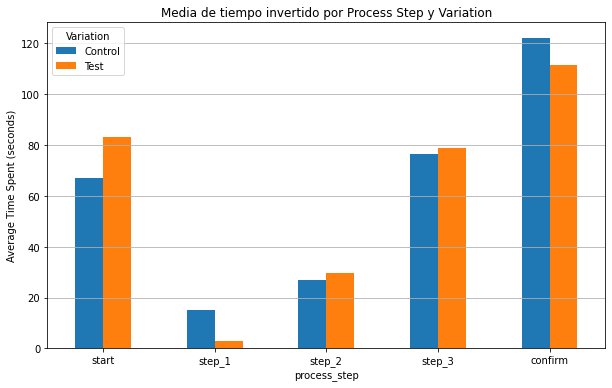

In [61]:
# Graficar usando matplotlib
pivot_table_seconds.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Average Time Spent (seconds)')
plt.title('Media de tiempo invertido por Process Step y Variation')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Variation')
plt.show()

##### - 5.3.2.3 Error rates, backsteps y total steps

In [62]:
# Definir el mapeo de pasos
step_mapping = {'start': 0,'step_1': 1,'step_2': 2,'step_3': 3,'confirm': 4}

# Función para calcular el error rate por grupo
def calculate_error_rate(group):
    group = group.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])
    group['step_numeric'] = group['process_step'].map(step_mapping)
    group['previous_step_numeric'] = group.groupby(['client_id', 'visitor_id', 'visit_id'])['step_numeric'].shift(1)
    group['backstep'] = group['step_numeric'] < group['previous_step_numeric']
    
    backsteps_count = group['backstep'].sum()
    total_steps = len(group)
    error_rate = backsteps_count / total_steps * 100 if total_steps > 0 else 0
    
    return pd.Series({
        'backsteps_count': backsteps_count,
        'total_steps': total_steps,
        'error_rate': f"{error_rate:.2f}%"
    })

# Aplicar el cálculo del error rate desglosado por Variation
error_rate_by_variation = interactions_df.groupby('Variation').apply(calculate_error_rate)
error_rate_by_variation

,backsteps_count,total_steps,error_rate
Variation,,,
Control,9484,143462,6.61%
Test,16177,177847,9.10%


In [63]:
import pandas as pd

# Aplicar el cálculo del error rate desglosado por Variation y convertir el resultado en un DataFrame
error_rate_df = interactions_df.groupby('Variation').apply(calculate_error_rate).reset_index()

# Asegurarse de que las columnas están correctamente nombradas y formateadas
error_rate_df.columns = ['Variation', 'Backsteps Count', 'Total Steps', 'Error Rate']



### 6. Hypothesis testing

#### 6.1 Completion Rate (two-proportion z-test)

Formulación de la hipótesis nula:
- Hipótesis Nula (H0):
La hipótesis nula afirma que el Completion Rate para el grupo Test (nuevo diseño) **es igual** al C-R para el grupo Control (antiguo diseño)
    - **H0: pTest = pControl**

- Hipótesis Alternativa (H1):
La hipótesis alternativa sostiene que que el Completion Rate para el grupo Test (nuevo diseño) **no es igual** al C-R para el grupo Control (antiguo diseño)
    - **H1: pTest ≠ pControl**

In [64]:
import statsmodels.api as sm

# Obtenemos los números de éxitos y el total de intentos para cada grupo
# 'completed_by_variation' y 'total_participants_by_variation' están calculados desde el cálculo del Completion Rate
successes = [
    completed_by_variation['Test'],  # Número de usuarios que completaron en el grupo Test
    completed_by_variation['Control']  # Número de usuarios que completaron en el grupo Control
]
nobs = [
    total_participants_by_variation['Test'],  # Total de usuarios que interactuaron en cualquier paso en el grupo Test
    total_participants_by_variation['Control']  # Total de usuarios en el grupo Control
]

# Realizar el two-proportion z-test
z_stat, p_value = sm.stats.proportions_ztest(successes, nobs)

# Establecer el nivel de significancia
alpha = 0.05

# Mostrar los resultados del test de hipótesis
print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_value}")

# Interpretar los resultados
if p_value < alpha:
    print("Rechazamos la hipótesis nula: el Completion Rate para el grupo Test (nuevo diseño) es igual al C-R para el grupo Control (antiguo diseño).")
else:
    print("No se puede rechazar la hipótesis nula: el Completion Rate para el grupo Test (nuevo diseño) no es igual al C-R para el grupo Control (antiguo diseño).")


Z-statistic: 5.63
P-value: 1.8002838595848202e-08
Rechazamos la hipótesis nula: el Completion Rate para el grupo Test (nuevo diseño) es igual al C-R para el grupo Control (antiguo diseño).


#### 6.2 Completion Rate with a Cost-Effectiveness Threshold

Formulación de la hipótesis nula:
- Hipótesis Nula (H0):
La hipótesis nula afirma que la tasa de finalización para el grupo de Test (nuevo diseño) es igual a o menor que la tasa de finalización para el grupo de Control (diseño antiguo) incrementada en un 5%. Formalmente:
    - **H0: pTest ≤ pControl+0.05**
    - donde pTest es la proporción de éxito en el grupo Test y pControl es la proporción de éxito en el grupo Control. El "+ 0.05" representa un incremento del 5% en la proporción de éxito del grupo Control, considerando esto como un umbral de mejora aceptable para el nuevo diseño en términos de costo-efectividad.

- Hipótesis Alternativa (H1):
La hipótesis alternativa sostiene que la tasa de finalización para el grupo de Test es mayor que la tasa de finalización para el grupo de Control aumentada en un 5%. Formalmente:
    - **H1: pTest > pControl+0.05**
    - Esta hipótesis alternativa es lo que se intenta probar: que el grupo Test no solo alcanza la tasa de finalización del grupo Control, sino que supera el umbral de mejora del 5% establecido, lo que sugiere que las modificaciones en el diseño son efectivamente mejores que las mejoras marginales en costes.

In [65]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# Calcular el número de éxitos y el número de intentos para el test de proporciones
successes = [
    completed_by_variation.get('Test', 0),
    completed_by_variation.get('Control', 0)
]
nobs = [
    total_participants_by_variation.get('Test', 0),
    total_participants_by_variation.get('Control', 0)
]

# Ajustar la tasa de finalización de Control en un 5%
adjusted_control_successes = int((successes[1] / nobs[1] + 0.05) * nobs[1]) if nobs[1] != 0 else 0

# Realizar el two-proportion z-test (una sola cola para ver si Test es significativamente mayor)
z_stat, p_value = proportions_ztest([successes[0], adjusted_control_successes], [nobs[0], nobs[1]], alternative='larger')

# Mostrar resultados
print("Completion Rates by Variation:")
print(f"Test: {successes[0] / nobs[0] * 100:.2f}%, Control (adjusted +5%): {(adjusted_control_successes / nobs[1] * 100 if nobs[1] != 0 else 0):.2f}%")
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:}")

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: La tasa de finalización del grupo 'Test' (nuevo diseño) ≤ a la tasa de finalización del grupo 'Control' (diseño antiguo) incrementada en un 5%.")
else:
    print("No se puede rechazar la hipótesis nula: La tasa de finalización del grupo 'Test' (nuevo diseño) > a la tasa de finalización del grupo 'Control' (diseño antiguo), incrementada en un 5%.")


Completion Rates by Variation:
Test: 16.52%, Control (adjusted +5%): 20.63%
Z-statistic: -24.641
P-value: 1.0
No se puede rechazar la hipótesis nula: La tasa de finalización del grupo 'Test' (nuevo diseño) > a la tasa de finalización del grupo 'Control' (diseño antiguo), incrementada en un 5%.


#### 6.3 Comparar si la edad promedio de los clientes que interactúan con el nuevo proceso es igual a la de los del proceso antiguo

##### 6.3.1 - Adaptación del df para poder realizar el test de hipótesis

In [66]:
# Fusión de: "Ánalisis final_demo_df. Datos demográficos" con,  "final_experiment_clients_df":
merge_ages_vs_experiment_df = pd.merge(final_demo_df, final_experiment_clients_df, on='client_id', how='inner')
merge_ages_vs_experiment_df


,client_id,clnt_Yr_permanency,clnt_Mnth_permanency,age,gender,accounts,balance,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [67]:
null_values_summary0 = merge_ages_vs_experiment_df.isnull().sum()
null_values_summary0

client_id                   0
clnt_Yr_permanency         14
clnt_Mnth_permanency       14
age                        15
gender                     14
accounts                   14
balance                    14
calls_6_mnth               14
logons_6_mnth              14
Variation               20109
dtype: int64

In [68]:
cleaned_merge_ages_vs_experiment_df = merge_ages_vs_experiment_df.dropna()
cleaned_merge_ages_vs_experiment_df

,client_id,clnt_Yr_permanency,clnt_Mnth_permanency,age,gender,accounts,balance,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [69]:
null_values_summary1 = cleaned_merge_ages_vs_experiment_df.isnull().sum()
null_values_summary1

client_id               0
clnt_Yr_permanency      0
clnt_Mnth_permanency    0
age                     0
gender                  0
accounts                0
balance                 0
calls_6_mnth            0
logons_6_mnth           0
Variation               0
dtype: int64

##### 6.3.2 - Realización del test de hipótesis

Formulación de la hipótesis nula:
- H0: μ nuevo = μ antiguo
- ​H1: μ nuevo ≠ μ antiguo
- nivel de significancia (α): 0.05
- Prueba de hipótesis: t para muestras independientes (de 2 muestras)

In [70]:
import scipy.stats as stats

# Obtener las edades para cada variación
new_process_ages = cleaned_merge_ages_vs_experiment_df[cleaned_merge_ages_vs_experiment_df['Variation'] == 'Test']['age']
old_process_ages = cleaned_merge_ages_vs_experiment_df[cleaned_merge_ages_vs_experiment_df['Variation'] == 'Control']['age']

# Prueba t para dos muestras independientes
t_stat, p_value = stats.ttest_ind(new_process_ages, old_process_ages)

# Nivel de significancia
alpha = 0.05

# Resultados
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula: las edades promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: las edades promedio son iguales.")


T-statistic: -2.4161
P-value: 0.0157
Rechazamos la hipótesis nula: las edades promedio son diferentes.


#### 6.4 Test de hipótesis relacionado con la permanencia (clnt_Yr_permanency) de los clientes que interactúan con el nuevo proceso y el antiguo: Engagement por antiguedad en la relación con Vanguard

Formulación de la hipótesis nula:
- H0: μ nuevo = μ antiguo
- ​H1: μ nuevo ≠ μ antiguo
- nivel de significancia (α): 0.05
- Prueba de hipótesis: t para muestras independientes (de 2 muestras)

In [71]:
import scipy.stats as stats

# Obtener los datos de permanencia para cada variación
new_process_permanency = cleaned_merge_ages_vs_experiment_df[cleaned_merge_ages_vs_experiment_df['Variation'] == 'Test']['clnt_Yr_permanency']
old_process_permanency = cleaned_merge_ages_vs_experiment_df[cleaned_merge_ages_vs_experiment_df['Variation'] == 'Control']['clnt_Yr_permanency']

# Prueba t para dos muestras independientes
t_stat, p_value = stats.ttest_ind(new_process_permanency, old_process_permanency, equal_var=False)

# Nivel de significancia
alpha = 0.05

# Resultados
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula: las permanencias promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: las permanencias promedio son iguales.")

T-statistic: -1.7143
P-value: 0.0865
No se puede rechazar la hipótesis nula: las permanencias promedio son iguales.


#### 6.5 Test de hipótesis, realizar un análisis sobre si hay diferencias de género que afectan la interacción con el proceso nuevo o el antiguo.

Formulación de la hipótesis nula:
- H0: No hay diferencia en las proporciones de género entre los grupos Test y Control. Es decir, el género no influye en la participación en los procesos nuevos o viejos.
- ​H1:  Existen diferencias en las proporciones de género entre los grupos Test y Control, lo que sugiere que el género podría influir en cómo los individuos interactúan con los procesos nuevos o viejos.
- nivel de significancia (α): 0.05
- Prueba de hipótesis: prueba Chi-cuadrado

In [72]:
import pandas as pd
import scipy.stats as stats

# Crear una tabla de contingencia para contar el nº de hombres y mujeres de cada grupo (Test y Control)
contingency_table = pd.crosstab(
    cleaned_merge_ages_vs_experiment_df['gender'],
    cleaned_merge_ages_vs_experiment_df['Variation']
)

# Mostrar la tabla de contingencia
print("Tabla de Contingencia:")
print(contingency_table)

# Realizar el test de Chi-cuadrado
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Mostrar resultados del test
print("\nResultados del Test de Chi-Cuadrado:")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretar los resultados
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Existen diferencias significativas en las proporciones de género entre los grupos Test y Control.")
else:
    print("No se puede rechazar la hipótesis nula: No hay diferencias significativas en las proporciones de género entre los grupos Test y Control.")


Tabla de Contingencia:
Variation  Control  Test
gender                  
F             7542  8716
M             7970  8977
U             8014  9268

Resultados del Test de Chi-Cuadrado:
Chi2 Statistic: 1.90
P-value: 0.3860
No se puede rechazar la hipótesis nula: No hay diferencias significativas en las proporciones de género entre los grupos Test y Control.


### 6. Interpretación de resultados

Eficacia del diseño:
- ¿Estaba el experimento bien estructurado?
    1. Definición de objetivos:
        - Objetivo Principal: La nueva interfaz de usuario (UI) incrementan las tasas de finalización
        - Objetivos Secundarios: El tiempo empleado en cada paso y las tasas de abandono arrojan un resultado mejorado para la nueva UI.
    2. Diseño del experimento:
        -  Aleatorización: que los participantes sean asignados aleatoriamente al grupo de Control o al grupo de Test para eliminar el sesgo de selección
        - Tamaño de la Muestra: Calcula el tamaño de muestra necesario para detectar una diferencia significativa entre los dos grupos con suficiente poder estadístico. Utiliza un análisis de poder teniendo en cuenta el tamaño del efecto esperado, el nivel de significancia (comúnmente 0.05) y el poder (comúnmente 0.80).[usualmente se hace mediante software estadístico o calculadoras en línea. El poder estadístico depende de tres factores principales: el nivel de significancia (usualmente 0.05), el poder deseado (usualmente 0.80, lo que significa un 20% de probabilidad de error tipo II), y el tamaño del efecto mínimo que deseas detectar.] Cálculo:
                    import statsmodels.stats.api as sms
                    # Supongamos que queremos detectar una diferencia mínima de proporción de 0.1 entre dos grupos
                        effect_size = sms.proportion_effectsize(0.5, 0.6)  # Control prop=0.5, Test prop=0.6
                    # Calculamos el tamaño de muestra necesario con un nivel de significancia del 5% y un poder del 80%
                        sample_size = sms.NormalIndPower().solve_power(
                            effect_size, 
                            power=0.8, 
                            alpha=0.05, 
                            ratio=1)  # Ratio de 1:1 entre grupos test y control
                        print(f"Sample size needed: {sample_size:.2f}")

        - Segmentación: Considera segmentar tu análisis de datos por demografía o comportamiento del usuario si cuentas con datos suficientes. Esto puede ayudar a identificar si ciertos segmentos responden de manera diferente a la nueva interfaz.
        - Sesgos: el sesgo por sexo no parece que suceda por la proporcionalidad entre ambos, otros sesgos: edad, clase social, tipo de cliente
    3. Marco Temporal: Lleva a cabo el test durante un periodo consistente y representativo para evitar sesgos introducidos por variabilidad basada en el tiempo (como fines de semana vs. días laborales, temporadas festivas, etc.)

                    import pandas as pd
                    import matplotlib.pyplot as plt

                    # Supongamos que tienes un DataFrame con una columna de fechas y una métrica de interés
                    data = pd.DataFrame({
                        'date': pd.date_range(start='2022-01-01', periods=120, freq='D'),
                        'metric': np.random.normal(0, 1, 120).cumsum()
                    })

                    data['date'] = pd.to_datetime(data['date'])
                    data.set_index('date', inplace=True)

                    # Graficar la métrica a lo largo del tiempo
                    data['metric'].plot()
                    plt.title('Historical Data Trend')
                    plt.xlabel('Date')
                    plt.ylabel('Metric')
                    plt.show()

    4.  Recolección y Seguimiento de Datos:
        - Métricas a Seguir:
            - Número de procesos completados.
            - Tiempo gastado en el sitio o páginas específicas.
            - Interacciones del usuario por página (clics, movimientos del mouse, CTR, tasa de rebote,  etc.).
            - Tasas de salida en cada paso del proceso.
            - Churn rate: abandonos
            - Usuarios únicos por Variation
            - Entradas por dispositivo
            - Tasa de conversión
            - Nº de visitas en cada paso
            - Tasa de fidelización
            - Nº de errores en el proceso (id_clients que no interaccionan con ninguna de la webs y qu etipo de clientes son[si son los tops o son clientes nornales])
            - Engagement:
                - Tasa de clicks.
                - Tiempo en la página.
                - Interacciones por visita.
                - Otros.
    5. Análisis de resultados.
        - Intervalos de confianza para la diferencia en las tasas de finalización para entender el rango de efectos plausibles.[Generalmente, los intervalos de confianza del 95% son utilizados para entender el rango de efectos plausibles.]

                    from scipy import stats
                    import numpy as np

                    # Datos de ejemplo
                    data = np.random.normal(loc=0, scale=1, size=100)

                    # Calcula la media y el intervalo de confianza del 95%
                    ci = stats.norm.interval(0.95, loc=np.mean(data), scale=stats.sem(data))

                    print(f"95% confidence interval: {ci}")





        - Tamaño del efecto: diferencia en tasas de finalización entre los grupos. Medida común del tamaño del efecto para proporciones es la d de Cohen, que se calcula como la diferencia entre dos medias dividida por la desviación estándar combinada [Un tamaño del efecto significativo indica que las diferencias observadas son no solo estadísticamente significativas sino también prácticamente importantes]
                import numpy as np

                # Supongamos estas proporciones de finalización
                p1 = 0.40  # Grupo Test
                p2 = 0.30  # Grupo Control

                # Supongamos estos tamaños de muestra
                n1 = 200
                n2 = 200

                # Calcular la d de Cohen para proporciones
                pooled_std = np.sqrt(((n1 - 1)*(p1*(1 - p1)) + (n2 - 1)*(p2*(1 - p2))) / (n1 + n2 - 2))
                d_cohen = (p1 - p2) / pooled_std
                print("d de Cohen:", d_cohen)

                La d de Cohen es una medida del tamaño del efecto que describe la diferencia entre dos medias en términos de desviación estándar. Específicamente:
                    d = 0.2 se considera un efecto pequeño.
                    d = 0.5 se considera un efecto medio.
                    d = 0.8 o más se considera un efecto grande.
                    Supongamos que has calculado la d de Cohen como se mostró en el ejemplo anterior y obtuviste un valor de 0.3. Esto indicaría que la diferencia entre los grupos es de 0.3 desviaciones estándar, un efecto pequeño a medio. Esto significa que aunque hay una diferencia detectable entre los grupos, no es particularmente grande, lo cual es importante para determinar si las diferencias son prácticamente significativas además de estadísticamente significativas.



    6. Otros datos, si se dispone, podrían mejorar el análisis



### 7. Presentación gráfica de resultados: Tableau

#### 7.1 Análsis

##### 1. **Tasa de Finalización**
   - **Métrica Principal**: Mide el porcentaje de usuarios que completan el proceso en cada grupo (Test y Control).
   - **Visualización**: Utiliza un gráfico de barras para comparar las tasas de finalización entre los grupos. Añadir una línea de tendencia si recolectas los datos en varios puntos temporales durante el experimento.

##### 2. **Tiempo Medio en el Proceso**
   - **Métrica de Comportamiento**: Calcula el tiempo promedio que los usuarios pasan en el proceso de finalización.
   - **Visualización**: Un diagrama de cajas (box plot) sería ideal para mostrar la distribución del tiempo en el sitio, destacando medianas, cuartiles y valores atípicos entre los grupos.

##### 3. **Tasa de Abandono por Etapa**
   - **Métrica de Comportamiento Detallado**: Identifica en qué etapa los usuarios abandonan el proceso. Esto puede indicar puntos problemáticos en la interfaz.
   - **Visualización**: Un gráfico de embudo (funnel chart) que muestre las tasas de abandono en cada etapa del proceso para ambos grupos. Esto puede ayudar a visualizar dónde los cambios en la UI pueden estar teniendo un impacto negativo o positivo.

##### 4. **Interacciones por Usuario**
   - **Métrica de Engagement**: Mide cuántas acciones realiza el usuario en promedio durante su visita (clics, desplazamientos, entradas de formulario).
   - **Visualización**: Gráficos de barras o histogramas que comparen las interacciones promedio por visita entre los dos grupos.

##### 5. **Satisfacción del Usuario** (propuestas de mejora)
   - **Métrica de Experiencia del Usuario**: Si es posible recolectar datos a través de encuestas de satisfacción o Net Promoter Score (NPS), estos pueden proporcionar información valiosa sobre cómo los usuarios perciben las diferentes interfaces.
   - **Visualización**: Gráficos de barras o gráficos de puntos para mostrar las puntuaciones de satisfacción o NPS. También puedes usar mapas de calor para representar respuestas a encuestas sobre aspectos específicos de la UI.

##### 6. **Conversiones Secundarias** (no aplica)
   - **Métricas Adicionales de Rendimiento**: Si hay acciones secundarias importantes (como suscripciones a newsletters, descargas de documentos, registros para eventos), también deberían rastrearse.
   - **Visualización**: Gráficos de líneas o barras que muestren las tasas de conversiones secundarias a lo largo del tiempo o entre grupos.

##### Presentación en Tableau
- **Dashboard Interactivo**: Combina todas estas visualizaciones en un único dashboard interactivo en Tableau, permitiendo a los stakeholders filtrar por fecha, grupo de usuario y otros parámetros relevantes.
- **Anotaciones y Herramientas de Contexto**: Incorpora anotaciones para explicar tendencias, picos o irregularidades en los datos. Utiliza herramientas como Tooltips para ofrecer más detalles cuando se pasa el cursor sobre partes específicas de las visualizaciones.
- **Uso de Colores y Layout**: Asegúrate de utilizar una paleta de colores consistente que diferencie claramente entre los grupos de Test y Control. Organiza el layout del dashboard de manera que fluya lógicamente de métricas generales a específicas.

#### 7.2 Tablas para los análisis

##### 7.2.1 Fusionado de DataFrames

Los DataFrames a fusionar son `final_demo_df` para los datos demográficos y de engagement, `final_web_data_df` para las visitas únicas y pasos dados, y `final_experiment_clients_df` para la asignación de clientes al experimento A/B:

```python
import pandas as pd

#1. Fusionar el DataFrame de datos del proceso web con el DataFrame del experimento A/B para añadir la columna 'Variation'
df_merged_tableau = pd.merge(final_web_data_df, final_experiment_clients_df, on='client_id', how='left')

#2.  Fusionar este DataFrame con el DataFrame de datos demográficos y de engagement
df_final_tableau = pd.merge(df_merged_tableau, final_demo_df, on='client_id', how='left')

#3.  Verificar la fusión
print(df_final_tableau.head())
```

##### 7.2.2 Descripción del Código

1. **Fusionar `final_web_data_df` y `final_experiment_clients_df`**:
   - Esta fusión añade la columna 'Variation' del DataFrame `final_experiment_clients_df` a `final_web_data_df`. Esto etiqueta cada visita con si perteneció al grupo de Control o Test.

2. **Fusionar el resultado con `final_demo_df`**:
   - Al integrar `final_demo_df`, se agregan datos demográficos y de engagement al DataFrame combinado. Esto permite un análisis más detallado que puede considerar factores como la edad, el género, la permanencia del cliente, etc.

3. **Verificación**:
   - Imprimir los primeros registros de `df_final` para confirmar que las columnas esperadas están presentes y correctamente alineadas.

##### 7.2.3 Uso Final

El DataFrame `df_final` resultante contiene una integración completa de los datos de visitas web, datos demográficos, engagement y asignación al experimento A/B. Se puede usar este DataFrame para realizar todos los análisis relativos a las métricas del experimento A/B como las tasas de finalización, tiempo en el proceso, tasa de abandono por etapa, etc.


In [73]:
import pandas as pd

#1. Fusionar el DataFrame de datos del proceso web con el DataFrame del experimento A/B para añadir la columna 'Variation'
df_merged_tableau = pd.merge(final_web_data_df, final_experiment_clients_df, on='client_id', how='left')

In [74]:
#1. Fusionar este DataFrame con el DataFrame de datos demográficos y de engagement
df_final_tableau = pd.merge(df_merged_tableau, final_demo_df, on='client_id', how='left')

In [75]:
#3.  Verificar la fusión
df_final_tableau.head()

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_Yr_permanency,clnt_Mnth_permanency,age,gender,accounts,balance,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0


In [76]:
df_final_tableau.shape

(755405, 14)

### 8. Exportación a CSV

In [77]:
# Exportación a CSV, unión de df:

#df_final_tableau.to_csv('/Users/juanfransf/IRONHACK/COURSE/GitHub_LESSONS/6 WEEK 6/MINI PROJECT WEEK 6/tableau/df_final_tableau.csv',encoding='latin-1',sep=';')

In [78]:
# Para cálculo del completion rate

#interactions_df.to_csv('/Users/juanfransf/IRONHACK/COURSE/GitHub_LESSONS/6 WEEK 6/MINI PROJECT WEEK 6/tableau/interactions_df.csv',encoding='latin-1',sep=';')
    # - Completion rate
#C_R_data_for_tableau_df.to_csv('/Users/juanfransf/IRONHACK/COURSE/GitHub_LESSONS/6 WEEK 6/MINI PROJECT WEEK 6/tableau/C_R_data_for_tableau_df.csv',encoding='latin-1',sep=';', index=False)

In [79]:
# Time spent on each step:

#pivot_table.to_csv('/Users/juanfransf/IRONHACK/COURSE/GitHub_LESSONS/6 WEEK 6/MINI PROJECT WEEK 6/tableau/pivot_table.csv',encoding='latin-1',sep=';', index=False)

In [80]:
# Exportar a CSV
#error_rate_df.to_csv('/Users/juanfransf/IRONHACK/COURSE/GitHub_LESSONS/6 WEEK 6/MINI PROJECT WEEK 6/tableau/error_rate_df.csv',encoding='latin-1',sep=';', index=False)

In [81]:
#Exportar a CSV df para tableau 

#interactions_df_tableau.to_csv('/Users/juanfransf/IRONHACK/COURSE/GitHub_LESSONS/6 WEEK 6/MINI PROJECT WEEK 6/tableau/interactions_df_tableau.csv',encoding='latin-1',sep=';')

In [82]:
# Exportar a CSV df de datos sociológicos
#final_demo_df.to_csv('/Users/juanfransf/IRONHACK/COURSE/GitHub_LESSONS/6 WEEK 6/MINI PROJECT WEEK 6/tableau/final_demo_df.csv',encoding='latin-1',sep=';')

##### 7.2.4 Métricas

- Tasa de Finalización: Utilizar la columna process_step para identificar si los usuarios alcanzan el paso 'confirm'. Calcula la proporción por grupo de variación.

- Tiempo Medio en el Proceso: Si tienes timestamps (date_time), puedes calcular el tiempo total o promedio que los usuarios pasan en el proceso, diferenciado por grupo.

- Tasa de Abandono por Etapa: Analiza en qué etapa los usuarios están dejando el proceso más frecuentemente, agrupado por variación.

- Interacciones por Usuario: Si tienes datos de interacciones específicas en el sitio, podrías analizar esto en detalle por tipo de usuario y grupo de variación.

- Satisfacción del Usuario y Conversiones Secundarias: Aunque no mencionas tener datos directos de satisfacción o conversiones secundarias, si existen en tus sistemas, deberían integrarse para análisis adicionales.

##### 7.2.5 KPI's

Para un experimento A/B que evalúa una nueva interfaz de usuario en comparación con una interfaz tradicional, es crucial seleccionar KPIs (Indicadores Clave de Rendimiento) que no solo muestren los resultados directos del experimento, sino que también proporcionen información sobre la experiencia general del usuario y la efectividad del diseño:

### 1. **Tasa de Finalización (Conversion Rate)**
   - **Descripción**: Este KPI mide el porcentaje de usuarios que completan el proceso desde el inicio hasta el final. Es el indicador más directo del éxito del experimento.
   - **Objetivo**: Determinar si la nueva interfaz conduce a una mayor tasa de finalización en comparación con la interfaz tradicional.

### 2. **Tiempo Medio en el Proceso (Average Time on Task)**
   - **Descripción**: Calcula el tiempo promedio que los usuarios gastan en completar todo el proceso o en etapas específicas.
   - **Objetivo**: Evaluar la eficiencia de la interfaz. Una reducción en el tiempo medio podría indicar una mejor usabilidad.

### 3. **Tasa de Abandono por Etapa (Drop-off Rate by Step)**
   - **Descripción**: Mide el porcentaje de usuarios que abandonan el proceso en cada etapa.
   - **Objetivo**: Identificar posibles puntos de fricción en la interfaz que podrían requerir mejoras.

### 4. **Número de Interacciones por Sesión (Number of Interactions per Session)**
   - **Descripción**: Registra la cantidad de interacciones (clics, desplazamientos, entradas de texto) que los usuarios realizan en cada sesión.
   - **Objetivo**: Comprender el nivel de compromiso y la facilidad de navegación en la nueva interfaz.

### 5. **Tasa de Error (Error Rate)**
   - **Descripción**: Mide la frecuencia de errores cometidos por los usuarios, como entradas incorrectas o pasos fallidos.
   - **Objetivo**: Evaluar la claridad de la interfaz y la facilidad de uso.

### 6. **Satisfacción del Usuario (User Satisfaction)**
   - **Descripción**: Puntuación de satisfacción recopilada a través de encuestas o Net Promoter Score (NPS) post-interacción.
   - **Objetivo**: Medir la percepción del usuario respecto a la nueva interfaz.

### 7. **Engagement y Participación en Funciones Clave (Engagement with Key Features)**
   - **Descripción**: Monitorea cómo los usuarios interactúan con funciones específicas que son nuevas o mejoradas en la interfaz de prueba.
   - **Objetivo**: Determinar si las nuevas o mejoradas funciones atraen más interacción en comparación con la versión control.

### Visualización de KPIs en Tableau
Para visualizar eficazmente estos KPIs, se creará un dashboard en Tableau que incluya:
- Gráficos de barras para comparar las tasas de finalización, abandono y satisfacción entre los grupos de Test y Control.
- Gráficos de líneas para analizar tendencias de tiempo medio en el proceso y tasa de error a lo largo del tiempo.
- Mapas de calor para visualizar el engagement en diferentes partes de la interfaz.
- Diagramas de embudo para ilustrar la tasa de abandono a través de las etapas del proceso.

### Consideraciones Adicionales
- **Segmentación de Datos**: Se valorará segmentar estos KPIs por demografía del usuario, tipo de dispositivo y otros factores relevantes para obtener insights más detallados.

##### KPI: 
- Exit Rate = 1−Visitantes en la Siguiente Etapa / Visitantes en la Etapa Actual
- Conversión Rate = 
- Bounce Rate = Nº de visitas sin interacción/total de visitas
- Error Rate = vuelta de los usuarios al paso anterior/nº total de pasos dados por los usuarios
​	
 


##### Métricas:
- Visitors = número de visitantes por cada etapa
​	
 

